# Data cleaning and pre-processing
### In this notebook, we clean and pre-process the raw dataset provided by Iowa State University. 

In [1]:
# Import data handling libraries
import pandas as pd
import numpy as np

# Import libraries for visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns

#read in the raw dataset
df = pd.read_csv('../Data/data_set_10_17.csv')

df.sample(5)

,STUDENT,MAJOR_CURR,MAJOR_COLL,CLSFN_YR,ENTRY_SEM_CD,ENTRY_CCYY,LEVEL,SEM_CCYY,SEM_CD,OFFER_DEPT_ABRVN,...,DEG_DATEDB,MAJOR_CURR.1,DEG_DESCR,LAST_RGST_TERM,CLSFN_YR.1,MAJOR_CURR.2,MAJOR_COLL.1,Workday Enrolled in Fall 2024,Workday Enrolled in Fall 2024 Class Standing,Workday Enrolled in Fall 2024 Primary Program of Study
3199,1348,MATH,S,3,F,2012,U,2014,S,MATH,...,5/7/2016,MATH,B.S. LIBERAL ARTS & SCIENCES ...,S16,4.0,MATH,S,NaN,NaN,NaN
22199,9494,MATH,S,2,F,2017,U,2018,F,MATH,...,5/9/2020,MATH,B.S. LIBERAL ARTS & SCIENCES ...,S21,6.0,EDUC,H,NaN,NaN,NaN
16660,7180,OPEN,S,3,F,2017,U,2017,F,MATH,...,5/14/2022,ARTDN,B.A. ART AND DESIGN 05-14-2022,S22,4.0,ARTDN,C,NaN,NaN,NaN
20705,8878,MATH,S,3,S,2016,U,2017,F,MATH,...,12/21/2019,MATH,B.S. LIBERAL ARTS & SCIENCES ...,F19,4.0,MATH,S,NaN,NaN,NaN
8852,3707,P LST,S,2,F,2015,U,2015,F,MATH,...,12/15/2018,L ST,B.L.S. LIBERAL STUDIES 12-15-2018 ...,F18,4.0,L ST,S,NaN,NaN,NaN


Each student comes with a unique integer identifier. The rows correspond to each course taken by the student. In the final dataset, we will have only one row per student, and the columns will correspond to courses. Our data cleaning therefore begins with:

1. Drop the unnecessary columns.

In [2]:
cols = df.columns.tolist()
# cols

"""Output:
['STUDENT',             #student identifier (integer)
 'MAJOR_CURR',          #major at time of taking the course
 'MAJOR_COLL',          #College of liberal arts for all courses
 'CLSFN_YR',            #Classification of the year (Freshman, Sophomore, etc.) when course was taken
 'ENTRY_SEM_CD',        #Semester of enrollment ('F' --> Fall, 'S' --> Spring, '1' --> Summer)
 'ENTRY_CCYY',          #Year of enrollment
 'LEVEL',               #Irrelevant, to be dropped
 'SEM_CCYY',            #Year in which course was taken
 'SEM_CD',              #Semester in which course was taken
 'OFFER_DEPT_ABRVN',    #Same for all rows (Math department)
 'CRSE',                #Course number (3 digit numeric string)
 'SECT',                #Course section
 'GRADE_CATGORY',       #Values: 'C- OR BELOW', 'ABOVE C-', 'Satisfactory/Pass'
 'CRSE_TITLE',          #Course title
 'SEM_CCYY.1',          #Year of graduation; NaN if the student did not graduate
 'SEM_CD.1',            #Semester of graduation; NaN if the student did not graduate
 'DEG_CD',              #Abbreviation of degree earned; NaN if the student did not graduate
 'DEG_DATEDB',          #Date of degree; NaN if the student did not graduate
 'MAJOR_CURR.1',        #Major at time of graduation; NaN if the student did not graduate
 'DEG_DESCR',           #Detailed description of the degree, including honors, minors etc.
 'LAST_RGST_TERM',      #Last registered term
 'CLSFN_YR.1',          #Classification of year when degree was received; NaN if student did not graduate
 'MAJOR_CURR.2',        #Second major, if any
 'MAJOR_COLL.1',        #College from which degree was obtained
 'Workday Enrolled in Fall 2024',
 'Workday Enrolled in Fall 2024 Class Standing',
 'Workday Enrolled in Fall 2024 Primary Program of Study']"""

#We will use the following columns:
cols = ['STUDENT',
        'ENTRY_CCYY', 'ENTRY_SEM_CD', 
        'SEM_CCYY', 'SEM_CD', 
        'SEM_CCYY.1', 'SEM_CD.1', 'DEG_CD',
        'GRADE_CATGORY', 'CRSE', 'CRSE_TITLE']

df = df[cols]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30394 entries, 0 to 30393
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STUDENT        30394 non-null  int64  
 1   ENTRY_CCYY     30394 non-null  int64  
 2   ENTRY_SEM_CD   30394 non-null  object 
 3   SEM_CCYY       30394 non-null  int64  
 4   SEM_CD         30394 non-null  object 
 5   SEM_CCYY.1     21130 non-null  float64
 6   SEM_CD.1       21130 non-null  object 
 7   DEG_CD         21130 non-null  object 
 8   GRADE_CATGORY  30394 non-null  object 
 9   CRSE           30394 non-null  object 
 10  CRSE_TITLE     30394 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ MB


We will use the following simple function to track how every step of cleaning modifies the dataset. 

In [3]:
def gradestats():
    students = df["STUDENT"].nunique()
    grads = df.groupby("STUDENT")["DEG_CD"].apply(lambda x: x.notnull().any()).sum()
    percent = np.round( grads/students * 100,2)
    print('Rows:', len(df))
    print('Students:', students)
    print('Grads:', grads)
    print('Grad rate:', percent)

print('Statistics in the initial dataset:')
gradestats()

Statistics in the initial dataset:
Rows: 30394
Students: 13065
Grads: 7622
Grad rate: 58.34


2. Next, we format the date/semester columns for entry, course, and graduation. We will combine each pair into a single unique identifier (float), named `ENT_SEM`, `CRSE_SEM`, and `GRAD_SEM`.
    - For enrollment, we encode Spring, Summer and Fall as $0.0$, $0.4$, and $0.6$, respectively.   
    - For course and graduation, we encode Spring, Summer and Fall as $0.4$, $0.6$, and $1.0$, respectively.
    - The new columns are computed by the formula (year mod 2000) + (sem value)
    - Thus, if a student enrolled in Fall 2012, and took a particular course in Spring 2014, then `ENT_SEM`$ = 12.6$ and `CRSE_SEM`$ = 14.4$. 
    - Similarly, if they graduated in Spring 2016, then `GRAD_SEM`$ = 16.4$.

In [4]:
#subtract 2000 from 'ENTRY_CCYY', 'SEM_CCYY', and 'SEM_CCYY.1'
for x in ['ENTRY_CCYY', 'SEM_CCYY', 'SEM_CCYY.1']:
    df[x] = df[x] - 2000

#encode df['ENTRY_SEM_CD] as {'F':0.6, 'S':0.2, '1':0.4}
#These floats represent how much of the (academic) year has passed at the time of enrollment.
df['ENTRY_SEM_CD'] = df['ENTRY_SEM_CD'].replace({'F':0.6,
                                                 '1':0.4,
                                                 'S':0.0})

#Next, we encode the semester in which the course was taken and the semester in which the student graduated
for sem in ['SEM_CD', 'SEM_CD.1']:
    df[sem] = df[sem].replace({'F': 1.0, 
                               '1': 0.6, 
                               'S': 0.4})

#create columns for entry, course, and grad semesters.
df['ENT_SEM'] = df['ENTRY_CCYY'] + df['ENTRY_SEM_CD']
df['CRSE_SEM'] = df['SEM_CCYY'] + df['SEM_CD']
df['GRAD_SEM'] = df['SEM_CCYY.1'] + df['SEM_CD.1']

df[['ENT_SEM','CRSE_SEM','GRAD_SEM']].sample(5)

/var/folders/br/143tjw8148nftd61z3w9qzv40000gp/T/ipykernel_30106/1706857129.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ENTRY_SEM_CD'] = df['ENTRY_SEM_CD'].replace({'F':0.6,
/var/folders/br/143tjw8148nftd61z3w9qzv40000gp/T/ipykernel_30106/1706857129.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[sem] = df[sem].replace({'F': 1.0,


,ENT_SEM,CRSE_SEM,GRAD_SEM
28549,18.6,19.4,24.4
27725,15.6,16.4,19.4
24003,15.6,20.0,20.0
3025,18.0,19.0,20.0
2112,17.6,19.4,22.4


3. Next, we drop students who enrolled before 2008 (because data is shaky), and also those who enrolled in Spring 2021 or later (since we cannot yet determine if these student will have graduated in 4 years or not).

In [5]:
#remove students who entered before 2008 (because the data is shaky)
df = df[df['ENT_SEM'] >= 8]

print('After removing students who entered before 2008:')
gradestats()

#remove students who entered on or after Spring 2021
df = df[df['ENT_SEM'] < 21]

print()
print('After dropping students who enrolled in Spring 2021 or later:')
gradestats()

After removing students who entered before 2008:
Rows: 30219
Students: 13013
Grads: 7578
Grad rate: 58.23

After dropping students who enrolled in Spring 2021 or later:
Rows: 24855
Students: 10012
Grads: 7385
Grad rate: 73.76


4. Next, we drop all students who received a graduate degree. (Note, we completely drop the student even though they may have also received a bachelors degree. This is because it is not clear whether a particular course was taken towards the bachelors degree or graduate degree).

In [6]:
#dropped degrees are graduate degrees. kept degrees are undergraduate degrees.
dropped_degrees = ['MRE', 'MCP', 'MED', 'MFA', 'MTR', 'MHC', 'MFS', 'MHO', 'MAA', 'DVM', 'MBS', 'MBA', 'MA', 'MEN', 'MFN', 'MAT', 'PHD', 'MS']

#get a list of all students who got a graduate degree
grad_students = df[df['DEG_CD'].isin(dropped_degrees)]['STUDENT'].unique()

#drop the above students
df = df[~df['STUDENT'].isin(grad_students)]

print('After dropping students who took classes towards a graduate degree')
gradestats()

After dropping students who took classes towards a graduate degree
Rows: 22362
Students: 9689
Grads: 7062
Grad rate: 72.89


5. Next, we drop all rows corresponding to courses taken after graduation. 
    
    We also re-format `CRSE_SEM` and `GRAD_SEM` to contain the timestamp relative to `ENT_SEM`, and we multiply by $2.5$ so that fall and spring count as 1 semester and Summer counts as half a semester (so a full year counts as $2.5$ semesters). 
    
    Our final target variable will be $1$ if the student "graduates in 4 years"-- for us, this means `GRAD_SEM` is at most $9.5$, which is the typical case when a student enrolls in Fall and graduates in Spring 4 years later.
    
    Accordingly, we won't consider courses taken after $9.5$ years, so we drop all rows where `CRSE_SEM` is greater than $9.5$.

In [7]:
#subtract ENT_SEM from CRSE_SEM and GRAD_SEM to get relative semester values
df['CRSE_SEM'] = (df['CRSE_SEM'] - df['ENT_SEM']).apply(lambda x: np. round(x*2.5, 2))
df['GRAD_SEM'] = (df['GRAD_SEM'] - df['ENT_SEM']).apply(lambda x: np. round(x*2.5, 2))

#remove entries corresponding to courses taken after 3.8 years
df = df[df['CRSE_SEM'] <= 9.5]

print('After dropping courses taken after 9.5 semesters:')
gradestats()

#drop all rows for which CRSE_SEM > GRAD_SEM
df = df[(df['GRAD_SEM'].isnull()) | (df['CRSE_SEM'] <= df['GRAD_SEM'])]

print()
print('After removing courses taken after graduation:')
gradestats()

After dropping courses taken after 9.5 semesters:
Rows: 21068
Students: 9401
Grads: 6821
Grad rate: 72.56

After removing courses taken after graduation:
Rows: 21059
Students: 9398
Grads: 6818
Grad rate: 72.55


6. We remove any duplicate rows at this point. (These exist because some of the original rows were repeated for each degree earned by the student.)

In [8]:
check = df[['STUDENT',
                'CRSE',
                'SEM_CCYY',
                'SEM_CD'
                ]]
#check how many duplicate rows are there in the dataset
check.duplicated().sum()

np.int64(1184)

In [9]:
"""Output: np.int64(1184)"""

#get the indices of the duplicate rows and drop them from the 'df' dataset
df.drop(index= check[check.duplicated()].index, inplace=True)

print('After dropping duplicates:')
gradestats()

After dropping duplicates:
Rows: 19875
Students: 9398
Grads: 6818
Grad rate: 72.55


7. Next, we format the course numbers and titles, combine together similar courses, and drop courses that are no longer offered, or which have an overall low enrollment (<50).

In [10]:
#remove the 'X' and 'H' appearing in any CRSE name
df['CRSE'] = df['CRSE'].str.replace('X', '')
df['CRSE'] = df['CRSE'].str.replace('H', '')

#remove all courses for which CRSE_TITLE contains 'EDUC'
df = df[~df['CRSE_TITLE'].str.contains('EDUC')]

#the courses x = '302' and '403' both refer to abstract algebra II, so let's combine them and call them '302'
#these are supposed to be the same, so re-number the '403' to '302'
df['CRSE'] = df['CRSE'].replace('403', '302')

#the courses x = '142' and '145' are both variations of trig, so let's combine them and call them '142'
df['CRSE'] = df['CRSE'].replace('145', '142')

#the course x='407' is applied linear algebra; very similar to '317', so let's combine them and call them '317'
df['CRSE'] = df['CRSE'].replace('407', '317')

#the courses x='497' and '397' are both about teaching secondary school math, we combine them and call them '397'
df['CRSE'] = df['CRSE'].replace('497', '397')

#it's natural to combine x = '490' (Independent Study) with x='495' (Special topics) and call them '495'
df['CRSE'] = df['CRSE'].replace('490', '495')

#combine '106' (Discovering math) with '105' (Intro to math ideas) and call them '105'
df['CRSE'] = df['CRSE'].replace('106', '105')

#drop '181' (Life sci calc & MDL 1) because it is no longer offered
df = df.drop(df[df['CRSE'] == '181'].index)

#cast the course numbers as integers
df['CRSE'] = df['CRSE'].astype(int)

#replace all courses >= 500 with 500 (grad courses)
df['CRSE'] = np.where(df['CRSE'] >= 500, 500, df['CRSE'])

#for any row with CRSE = 500, replace the CRSE_TITLE with 'GRADUATE MATH'
df['CRSE_TITLE'] = np.where(df['CRSE'] == 500, 'GRADUATE MATH', df['CRSE_TITLE'])

#if any CRSE corresponds to more than one CRSE_TITLE, then replace all CRSE_TITLES with the first one that appears
df['CRSE_TITLE'] = df.groupby('CRSE')['CRSE_TITLE'].transform('first')

#if any CRSE_TITLE corresponds to more than one CRSE, then replace all CRSEs with the first one that appears
df['CRSE'] = df.groupby('CRSE_TITLE')['CRSE'].transform('first')

#remove courses with less than 100 students
df = df.groupby('CRSE').filter(lambda x: len(x) >= 100)

print('After formatting courses, and removing courses with low enrollment:')
gradestats()

After formatting courses, and removing courses with low enrollment:
Rows: 18802
Students: 9181
Grads: 6647
Grad rate: 72.4


8. Next, we format the `GRADE_CATGORY` column, using the value $1$ for 'ABOVE C-' and 'Satisfactory/Pass', and $-1$ for 'C- OR BELOW'.

    Then, for each `x` in `courses` (list of all `CRSE` values appearing), we create a column which contains the grade ($\pm 1$) times the course semester (a float between $0.4$ and $3.8$). Thus, the values in `df[x]` will range from $-3.8$ to $3.8$.

In [11]:
df['CRSE'] = df['CRSE'].astype(str)
courses = df['CRSE'].unique().tolist()
courses.sort()
print(f'Left with {len(courses)} courses: \n',courses)

#format the grades
df['GRADE_CATGORY'] = df['GRADE_CATGORY'].map({'C- OR BELOW':-1,
                                               'ABOVE C-':1,
                                               'Satisfactory/Pass':1})


#We add one column for each course and temporarily stick a 0 in each column
for x in courses:
    df[x] = 0.0

# #rpelace grad_time with 3.8/grad_time. This is because the longer it takes to graduate, the less likely the student is to graduate. This also introduces an element of continuity in the values when we fill in the nan values (non-graduates) with 0.
# df['GRAD_SEM'] = 3.8/df['GRAD_SEM']
# df['GRAD_SEM'].fillna(0, inplace=True)

#Now, in each row, if a student has taken a course x, then the value in the column 'x' is replaced with the product of the 'GRADE_CATEGORY' and 'CRSE_SEM' 
for x in courses:
    df.loc[df['CRSE'] == x, x] = df['GRADE_CATGORY'] * df['CRSE_SEM']

df.info()

Left with 28 courses: 
 ['101', '104', '105', '140', '143', '150', '160', '165', '166', '201', '207', '25', '265', '266', '267', '301', '304', '314', '317', '341', '385', '397', '414', '435', '436', '492', '495', '500']
<class 'pandas.core.frame.DataFrame'>
Index: 18802 entries, 0 to 30378
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STUDENT        18802 non-null  int64  
 1   ENTRY_CCYY     18802 non-null  int64  
 2   ENTRY_SEM_CD   18802 non-null  float64
 3   SEM_CCYY       18802 non-null  int64  
 4   SEM_CD         18802 non-null  float64
 5   SEM_CCYY.1     14722 non-null  float64
 6   SEM_CD.1       14722 non-null  float64
 7   DEG_CD         14722 non-null  object 
 8   GRADE_CATGORY  18802 non-null  int64  
 9   CRSE           18802 non-null  object 
 10  CRSE_TITLE     18802 non-null  object 
 11  ENT_SEM        18802 non-null  float64
 12  CRSE_SEM       18802 non-null  float64
 13  GRAD_SEM   

In [12]:
#Let's visualize the enrollment counts of each course
crse_counts = df.groupby(by=['CRSE','CRSE_TITLE']).size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False).reset_index(drop=True)
crse_counts.to_csv('crse_counts.csv', index=False)
crse_counts

,CRSE,CRSE_TITLE,COUNT
0,165,CALCULUS I,2750
1,166,CALCULUS II,2270
2,265,CALCULUS III,1593
3,143,PREP FOR CALCULUS,1541
4,140,COLLEGE ALGEBRA,1292
5,104,INTRO TO PROBABILTY,1160
6,150,DISC MATH BUS&SOC S,1066
7,207,MATRCES&LINEAR ALGB,869
8,201,INTRO TO PROOFS,673
9,317,THRY LINEAR ALGEBRA,625


9. Finally, we remove the unnecessary columns and aggregate the dataset by student, taking the value in each column that is largest in absolute value (that is, we keep only the data of the last time a particular course was taken by a student). Finally, we add a column `Y` which equals 1 if `GRAD_SEM` is at most $3.8$, and $0$ otherwise. 

In [13]:
final_cols = ['STUDENT','ENT_SEM','GRAD_SEM'] + courses
df = df[final_cols]

#replace all null values with 0
df = df.fillna(0)

#group by student, choose the max value in each column
df = df.groupby('STUDENT').agg(lambda x: x.loc[x.abs().idxmax()]).reset_index()

#Add a column 'y' whose value is 0 if 'GRAD_SEM' is 0 or greater than 8, and 1 otherwise
df['Y'] = 0
df.loc[(df['GRAD_SEM'] > 0) & (df['GRAD_SEM'] <= 9.5), 'Y'] = 1

df.info()

print('After aggregating the dataset by student and adding the target variable:')
print('Rows:', len(df))
print('Students', df['STUDENT'].nunique())
print('Grads:', df['Y'].sum())
print('Grad rate:', np.round(df['Y'].mean() * 100, 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9181 entries, 0 to 9180
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDENT   9181 non-null   int64  
 1   ENT_SEM   9181 non-null   float64
 2   GRAD_SEM  9181 non-null   float64
 3   101       9181 non-null   float64
 4   104       9181 non-null   float64
 5   105       9181 non-null   float64
 6   140       9181 non-null   float64
 7   143       9181 non-null   float64
 8   150       9181 non-null   float64
 9   160       9181 non-null   float64
 10  165       9181 non-null   float64
 11  166       9181 non-null   float64
 12  201       9181 non-null   float64
 13  207       9181 non-null   float64
 14  25        9181 non-null   float64
 15  265       9181 non-null   float64
 16  266       9181 non-null   float64
 17  267       9181 non-null   float64
 18  301       9181 non-null   float64
 19  304       9181 non-null   float64
 20  314       9181 non-null   floa

In [14]:
#save the final dataset
df.to_csv('../Data/dataset_cleaned.csv', index=False)

At this point, the cleaning and pre-processing is done. We conclude this notebook by making dictionaries of the math major courses and general math courses.

In [15]:
crse_dict = \
{'101': 'ORIENTATION IN MATH',
 '104': 'INTRO TO PROBABILTY',
 '105': 'INTRO TO MATH IDEAS',
 '140': 'COLLEGE ALGEBRA',
 '143': 'PREP FOR CALCULUS',
 '150': 'DISC MATH BUS&SOC S',
 '160': 'SURVEY OF CALCULUS',
 '165': 'CALCULUS I',
 '166': 'CALCULUS II',
 '201': 'INTRO TO PROOFS',
 '207': 'MATRCES&LINEAR ALGB',
 '25': 'HIGH SCHOOL ALGEBRA',
 '265': 'CALCULUS III',
 '266': 'ELEM DIFF EQUATNS',
 '267': 'DIFF EQ & TRANSFMS',
 '301': 'ABSTRACT ALGEBRA I',
 '304': 'COMBINATORICS',
 '314': 'GRAPH THEORY',
 '317': 'THRY LINEAR ALGEBRA',
 '341': 'INTR THY PROBAB&S I',
 '385': 'INTR PART DIFF EQUA',
 '397': 'TEACH SEC SCHL MATH',
 '414': 'ANALYSIS I',
 '435': 'GEOMETRY I',
 '436': 'GEOMETRY II',
 '492': 'UNDERGRAD SEMINAR',
 '495': 'INDEPENDENT STUDY',
 '500': 'GRADUATE MATH'}

gen_dict = \
{'104': 'INTRO TO PROBABILTY',
 '105': 'INTRO TO MATH IDEAS',
 '140': 'COLLEGE ALGEBRA',
 '143': 'PREP FOR CALCULUS',
 '150': 'DISC MATH BUS&SOC S',
 '160': 'SURVEY OF CALCULUS',
 '165': 'CALCULUS I',
 '166': 'CALCULUS II',
 '207': 'MATRCES&LINEAR ALGB',
 '25': 'HIGH SCHOOL ALGEBRA',
 '265': 'CALCULUS III',
 '266': 'ELEM DIFF EQUATNS',
 '267': 'DIFF EQ & TRANSFMS'}

math_dict = \
{'101': 'ORIENTATION IN MATH',
 '201': 'INTRO TO PROOFS',
 '301': 'ABSTRACT ALGEBRA I',
 '304': 'COMBINATORICS',
 '314': 'GRAPH THEORY',
 '317': 'THRY LINEAR ALGEBRA',
 '341': 'INTR THY PROBAB&S I',
 '385': 'INTR PART DIFF EQUA',
 '397': 'TEACH SEC SCHL MATH',
 '414': 'ANALYSIS I',
 '435': 'GEOMETRY I',
 '436': 'GEOMETRY II',
 '492': 'UNDERGRAD SEMINAR',
 '495': 'INDEPENDENT STUDY',
 '500': 'GRADUATE MATH'}

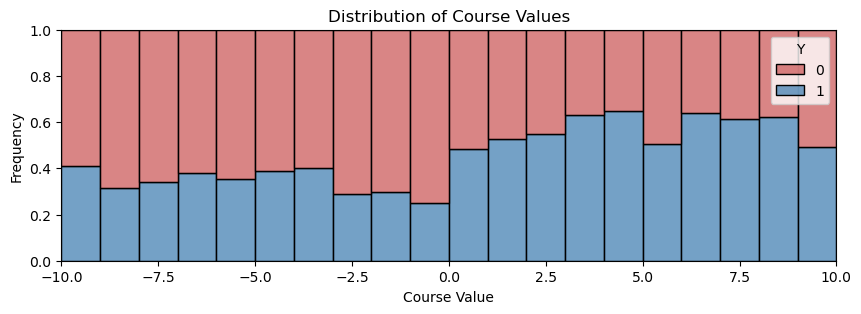

In [16]:
palette = {0: 'indianred', 1: 'steelblue'}
#get a list of all possible values in df[courses]
crse_values = [df[x].unique().tolist() for x in courses]

#flatten the list
crse_values = [item for sublist in crse_values for item in sublist]
crse_values = list(set(crse_values))
crse_values.sort()

# Reshape the DataFrame for plotting
melted_df = pd.melt(df, id_vars=['Y'], value_vars=courses, var_name='Course', value_name='Value')
# melted_df_nonzero = melted_df[melted_df['Value']]

#plot a histogram of how often each value in crse_values appears in df[courses]
fig, ax = plt.subplots(figsize=(10,3))
sns.histplot(data=melted_df,
             x='Value',
             hue='Y',
             multiple='fill',
             discrete=True,
             palette=palette,
             bins=len(crse_values),
             ax=ax)
plt.xlabel('Course Value')
# plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Distribution of Course Values')
plt.show()